# Modeling and Predicting

## Load Clinical Data and Labels

In [33]:
import os
import re
import numpy as np
import json
from random import shuffle
from PIL import Image
import matplotlib.pyplot as plt

label = json.load(open('D://CISC351//Group_Project_Data//CCRCC.json','r'))

In [34]:
f = open("cohort.csv","r")
all_dict = {} # id: subcategory
allFiles = f.read()
allFiles = allFiles.split('\n')
allFiles.pop(0)

'"_id","Case_ID","Specimen_ID","Slide_ID","Tumor","Topographic_Site","Specimen_Type","Weight","Tumor_Site","Pathology","Tumor_Histological_Type","Tumor_Segment_Acceptable","Percent_Tumor_Nuclei","Percent_Total_Cellularity","Percent_Necrosis","Normal Segment Free of Tumor","HasRadiology","Radiology","Genomics","Proteomics","Genomics_Available","GDC Link","Proteomics_Available","PDC Link","Gender","Age","Vital status at 12months follow up","Vital status at 24months follow up","Ethnicity","Race","Fully Qualified"'

In [35]:
for i in range(len(allFiles)):
    allFiles[i] = allFiles[i].split(',')
    all_dict[allFiles[i][3]] = allFiles[i][6]

In [36]:
imgDir = os.listdir(".//CCRCC_JPEG")

r = re.compile(".*dzi")

newlist = list(filter(r.match,imgDir))
for d in newlist:
    imgDir.remove(d)

print(len(imgDir))

782


## Load Training and Testing Image sets

In [37]:
def crop(input):
    im = Image.open(input)
    imgwidth, imgheight = im.size
    
    box = (224, 224, 288, 288)
    a = im.crop(box)
    #o.save(os.path.join(path,"PNG","%s" % page,"IMG-%s.png" % k))
    return a       

def load_training_data():
    train_data = []
    
    #for j in range(len(imgDir)):
    for j in range(0, 5):
        
        if (all_dict['"'+imgDir[j].replace('_files','')+'"']=="\"normal_tissue\""):
            label = np.array([1,0])
        
        else:
            label = np.array([0,1])
                
        for img in os.listdir(".//CCRCC_JPEG//"+imgDir[j]+"//20.0"):
            path = os.path.join(".\\CCRCC_JPEG\\"+imgDir[j]+"\\20.0", img)
            
            #img = Image.open(path)
            img = crop(path)
            train_data.append([np.array(img), label])
            
    
    shuffle(train_data)
    return train_data

In [58]:
def load_test_data():
    train_data = []
    
    #for j in range(len(imgDir)):
    for j in range(100, 105):
        
        if (all_dict['"'+imgDir[j].replace('_files','')+'"']=="\"normal_tissue\""):
            label = np.array([1,0])
        
        else:
            label = np.array([0,1])
                
        for img in os.listdir(".//CCRCC_JPEG//"+imgDir[j]+"//20.0"):
            path = os.path.join(".\\CCRCC_JPEG\\"+imgDir[j]+"\\20.0", img)
            
            #img = Image.open(path)
            img = crop(path)
            train_data.append([np.array(img), label])
    
    shuffle(train_data)
    return train_data

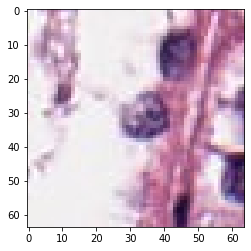

In [39]:
# function creates tensors that are too large for memory. Need to figure out another way to build the tensors. Number of images per directory found in the next cell.
im = load_training_data()
plt.imshow(im[0][0])

## CNN Model Creation

In [40]:
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers. normalization import BatchNormalization

model = Sequential()

In [41]:
img_height = 64
img_width = 64

model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(img_height,img_width, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation = 'softmax'))

In [42]:
trainImages = np.array([i[0] for i in im]).reshape(-1, img_height, img_width, 3)
trainLabels = np.array([i[1] for i in im],dtype = "object") 

In [43]:
trainImages = np.asarray(trainImages).astype(np.int)
trainLabels = np.asarray(trainLabels).astype(np.int)

In [44]:
print(sum(trainLabels))

[1464 1299]


In [49]:
print(len(trainLabels))

2763


In [45]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [46]:
model.fit(trainImages, trainLabels, batch_size = 50, epochs = 5, verbose = 1)

Epoch 1/5
2763/2763 [==============================] - 3s 1ms/step - loss: 0.9426 - accuracy: 0.5414
Epoch 2/5
2763/2763 [==============================] - 2s 859us/step - loss: 0.5797 - accuracy: 0.7032
Epoch 3/5
2763/2763 [==============================] - 2s 857us/step - loss: 0.5134 - accuracy: 0.7597
Epoch 4/5
2763/2763 [==============================] - 2s 857us/step - loss: 0.4310 - accuracy: 0.8024
Epoch 5/5
2763/2763 [==============================] - 2s 860us/step - loss: 0.3764 - accuracy: 0.8342


In [59]:
im = load_test_data()

In [60]:
testImages = np.array([i[0] for i in im]).reshape(-1, img_height, img_width, 3)
testLabels = np.array([i[1] for i in im],dtype = "object") 
testImages = np.asarray(trainImages).astype(np.int)
testLabels = np.asarray(trainLabels).astype(np.int)
print(trainImages.shape)

(2763, 64, 64, 3)


In [61]:
print(sum(testLabels))

[1464 1299]


## Model Evaluation

In [62]:
loss, acc = model.evaluate(trainImages, trainLabels, verbose = 0)
print(acc * 100)

47.339844703674316
